In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier,LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## load data

In [3]:
path = 'yelp_data/health_text_sentiment.csv'
df = pd.read_csv(path)
df.drop(['Unnamed: 0'],axis=1,inplace=True)

df = df[['stars','text',
 'clean_text']]

In [4]:
data = df.ix[np.where((df.stars==1)|(df.stars==5))]
# data.stars.replace(1,0,inplace=True)
# data.stars.replace(5,1,inplace=True)

data.head()

,stars,text,clean_text
0,1,Please stay away from this place if you can! I...,please stay away place bad care imaginable sta...
1,5,My husband has been a patient of Dr. Byrne for...,husband patient dr byrne last year half last m...
4,1,I wish I could give 0 stars. Worst office I've...,wish could give star bad office ever horrible ...
5,1,I went to the emergency room because i was hav...,go emergency room kidney stone attack emergenc...
6,5,Dr. Byrne is an excellent doctor with all the ...,dr byrne excellent doctor right skill include ...


In [5]:
# split
X = data['text'].values.astype(str)
Xc = data['clean_text'].values.astype(str)

y = data['stars'].values

## train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# CountVectorizer

In [7]:
count_vectorizer = CountVectorizer()
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

## TfidfVectorizer

In [8]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

## MultinomialNB

## CountVectorizer

In [9]:
count_vectorizer = CountVectorizer()
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

## TfidfVectorizer

In [12]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [10]:
mn_count_clf = MultinomialNB(alpha=0.3)

mn_count_clf.fit(count_train, y_train)
pred = mn_count_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.957


In [11]:
mn_tfidf_clf = MultinomialNB(alpha=0.6)
mn_tfidf_clf.fit(tfidf_train, y_train)
pred = mn_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.968


## LogisticRegression

In [13]:
count_vectorizer = CountVectorizer()
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)


tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2),max_df=0.1)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [14]:
lr_count_clf = LogisticRegression(C=2)
lr_count_clf.fit(count_train, y_train)
score = lr_count_clf.score(count_test, y_test)
print("accuracy:   %0.3f" % score)

accuracy:   0.970


In [17]:
lr_tfidf_clf = LogisticRegression(C=10)
lr_tfidf_clf.fit(tfidf_train, y_train)
score = lr_tfidf_clf.score(tfidf_test, y_test)
print("accuracy:   %0.5f" % score)

accuracy:   0.98138


## LinearSVC()

In [18]:
count_vectorizer = CountVectorizer()
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)


tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2),max_df=0.1)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [23]:
svc_count_clf = LinearSVC(C=0.8)
svc_count_clf.fit(count_train, y_train)
pred = svc_count_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.966


In [21]:
svc_tfidf_clf = LinearSVC(C=10)
svc_tfidf_clf.fit(tfidf_train, y_train)
pred = svc_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.984


## plot ROC Curve

ValueError: dimension mismatch

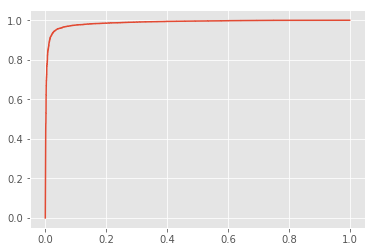

In [24]:
plt.figure(0).clf()

for model, name in [ (mn_count_clf, 'MultinomialNB count'),
                     (mn_tfidf_clf, 'MultinomialNB tfidf'),
                     (lr_count_clf, 'LogisticRegression count'),
                    (lr_tfidf_clf, 'LogisticRegression  tfidf'),
                    (svc_count_clf, 'LinearSVC count'),
                    (svc_tfidf_clf, 'LinearSVC tfidf')]:
    
    
    
    if 'LinearSVC tfidf' in name:
        pred = model.decision_function(tfidf_test)
    elif 'LinearSVC count' in name:
        pred = model.decision_function(count_test)

    elif 'count' in name:
        pred = model.predict_proba(count_test)[:,1]
    elif 'MultinomialNB' in name:
        pred = model.predict_proba(tfidf_test)[:,1]
    fpr, tpr, thresh = metrics.roc_curve(y_test, pred, pos_label=5)
    plt.plot(fpr,tpr,label="{}".format(name))
plt.title('ROC ')
plt.legend(loc=0)
plt.show()

## Important features

In [25]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    
    Modified by @kjam to support a dict return.
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    return {class_labels[0]: topn_class1,
            class_labels[1]: topn_class2
    }

In [26]:
classifiers = [(mn_count_clf, count_vectorizer),
               (mn_tfidf_clf, tfidf_vectorizer),
               (lr_count_clf, count_vectorizer),
               (lr_tfidf_clf, tfidf_vectorizer),
                (svc_count_clf, count_vectorizer),
               (svc_tfidf_clf, tfidf_vectorizer)]

In [27]:
results = {}
for clf, vct in classifiers:
    results[clf] = most_informative_feature_for_binary_classification(vct, clf, n=10)

In [28]:
comparable_results = {5: {}, 1: {}}
for clf, data in results.items():
    clf_name = clf.__class__.__name__
    for label, features in data.items():
        for rank, score_tuple in enumerate(features):
            if score_tuple[1] in comparable_results[label]:
                comparable_results[label][score_tuple[1]].append((rank + 1, clf_name))
            else:
                comparable_results[label][score_tuple[1]] = [(rank + 1, clf_name)]

In [29]:

agg_results = {}
for label, features in comparable_results.items():
    for feature, ranks in features.items():
        if feature in agg_results:
            print("WARNING! DUPLICATE LABEL!!! {}".format(feature))
        agg_results[feature] = {
            'label': label,
            'agg_rank': np.mean([r[0] for r in ranks]),
            'count': len(ranks)
        }

In [30]:
comparison_df = pd.DataFrame(agg_results).T

In [31]:

comparison_df.head()

,agg_rank,count,label
for,1.0,1.0,5.0
dr,2.0,1.0,5.0
of,3.0,1.0,5.0
in,4.0,1.0,5.0
is,5.0,1.0,5.0


In [32]:
top10_fivestars = comparison_df[comparison_df['label'] == 5].sort_values('count', ascending=0).head(10)
top10_fivestars

,agg_rank,count,label
wonderful,4.250000,4.0,5.0
love,6.750000,4.0,5.0
awesome,6.750000,4.0,5.0
thank,5.666667,3.0,5.0
friendly and,2.000000,2.0,5.0
happier,10.000000,2.0,5.0
pleased,4.000000,2.0,5.0
the best,10.000000,2.0,5.0
highly recommend,9.000000,2.0,5.0
excellent,4.500000,2.0,5.0


In [33]:
top10_onestars = comparison_df[comparison_df['label'] == 1].sort_values('count', ascending=0).head(10)
top10_onestars

,agg_rank,count,label
horrible,4.25,4.0,1.0
worst,1.75,4.0,1.0
rude,2.25,4.0,1.0
terrible,4.75,4.0,1.0
unprofessional,5.75,4.0,1.0
incompetent,9.00,3.0,1.0
melodie,4.50,2.0,1.0
not recommend,8.50,2.0,1.0
should,9.00,2.0,1.0
money,7.50,2.0,1.0
